Analysis of User Fitbit Data <br>
Nicole Blaustein <br>
DS 4003 <br>

<small>I chose this data because I want to create a dashboard that analyzes Fitbit exercise data and allows users to easily view their workout summaries and trends. I found a dataset on Kaggle of 30 Fitbit users' data from most days in the time period April 12 to May 12 2016. I then added my Fitbit data from last month (January) to this dataset. Important variables included are steps taken, distance, very active minutes, fairly active minutes, lightly active minutes, sedentary minutes, total calories burned, and calories burned during activity.</small> <br>
https://www.kaggle.com/datasets/arashnic/fitbit <br>
https://fitbit.com/global/us/account <br>

**Data Provenance:** <br>
<small> The Fitbit data was sourced from responses to a survey distributed by Amazon Mechanical Turk between the dates of March 12 2016 and May 12 2016. Personal tracker data was submitted by 30 consenting Fitbit users. The additional data is sourced from Fitbit data exports and includes my personal tracker data from January 1 2024 to January 31 2024. </small>

In [204]:

#import dependencies 
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt

In [278]:
#Read in the data 
my_data=pd.read_csv('C:/Users/nblau/Documents/Ds 4003/fitbit_export - january fitness data.csv')
kaggle_data=pd.read_csv('C:/Users/nblau/Documents/Ds 4003/dailyActivity_merged.csv')

In [279]:
#View my data 
my_data.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2024-01-01,"1,456",0,0.00,0,"1,440",0,0,0,0
1,2024-01-02,"1,982","3,842",1.05,0,"1,315",74,19,32,643
2,2024-01-03,"1,988","5,884",2.26,0,"1,326",72,6,36,642
3,2024-01-04,"1,485",298,0.13,0,"1,438",2,0,0,5
4,2024-01-05,"1,457",0,0.00,0,"1,440",0,0,0,0


In [165]:
#View the kaggle data 
kaggle_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


The data needs to be merged. In order to do this every column must line up and have the same names 

**Initial Data Cleaning and Merging of the Datasets**

In [280]:

#Rename columns in my data to match the columns in the kaggle dataset 
my_data = my_data.rename(columns={'Date': 'ActivityDate',
                                   'Calories Burned': 'Calories',
                                   'Distance': 'TotalDistance',
                                   'Steps': 'TotalSteps',
                                   'Minutes Sedentary': 'SedentaryMinutes',
                                   'Minutes Lightly Active': 'LightlyActiveMinutes',
                                   'Minutes Fairly Active': 'FairlyActiveMinutes',
                                   'Minutes Very Active': 'VeryActiveMinutes',
                                   'Activity Calories': 'ActivityCalories'})

# Create 'Id' column filled with all 1s in my data to match the Id column in the kaggle dataset (the 1 is arbitrary - just represents me)
my_data['Id'] = 1

# Drop uneccessary columns from my data and from the kaggle data 
my_data.drop(columns=['Floors'], inplace=True)
kaggle_data.drop(columns=['TrackerDistance'], inplace=True)
kaggle_data.drop(columns=['LoggedActivitiesDistance'], inplace=True)
kaggle_data.drop(columns=['VeryActiveDistance', 'ModeratelyActiveDistance',
                           'LightActiveDistance', 'SedentaryActiveDistance'], inplace=True)

#ActivityCalories only exists in my data, so create a column filled with nans in the kaggle data to allow the datasets to merge 
kaggle_data['ActivityCalories'] = float('nan')
#Calories is not relevant in my data because my Fitbit was only used during exercise, so fill these values with nans 
my_data['Calories'] = float('nan')


# Convert date columns to datetime to give them a consistent format
my_data['ActivityDate'] = pd.to_datetime(my_data['ActivityDate'])
kaggle_data['ActivityDate'] = pd.to_datetime(kaggle_data['ActivityDate'])


In [282]:
my_data.head()

,ActivityDate,Calories,TotalSteps,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,ActivityCalories,Id
0,2024-01-01,NaN,0,0.00,"1,440",0,0,0,0,1
1,2024-01-02,NaN,"3,842",1.05,"1,315",74,19,32,643,1
2,2024-01-03,NaN,"5,884",2.26,"1,326",72,6,36,642,1
3,2024-01-04,NaN,298,0.13,"1,438",2,0,0,5,1
4,2024-01-05,NaN,0,0.00,"1,440",0,0,0,0,1


In [138]:
kaggle_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityCalories
0,1503960366,2016-03-25,11004,7.11,33,12,205,804,1819,NaN
1,1503960366,2016-03-26,17609,11.55,89,17,274,588,2154,NaN
2,1503960366,2016-03-27,12736,8.53,56,5,268,605,1944,NaN
3,1503960366,2016-03-28,13231,8.93,39,20,224,1080,1932,NaN
4,1503960366,2016-03-29,12041,7.85,28,28,243,763,1886,NaN


In [283]:
#Remove the commas in the TotalSteps and SedentaryMinutes columns in my data (the commas cause an issue when merging)
my_data['TotalSteps'] = my_data['TotalSteps'].str.replace(',', '')
my_data['SedentaryMinutes'] = my_data['SedentaryMinutes'].str.replace(',', '')
#convert the TotalSteps and SedentaryMinutes columns to numeric in both datasets (this was also causing an issue while merging)
my_data['TotalSteps'] = pd.to_numeric(my_data['TotalSteps'], errors='coerce')
kaggle_data['TotalSteps'] = pd.to_numeric(kaggle_data['TotalSteps'], errors='coerce')
kaggle_data['SedentaryMinutes'] = pd.to_numeric(kaggle_data['SedentaryMinutes'], errors='coerce')
my_data['SedentaryMinutes'] = pd.to_numeric(my_data['SedentaryMinutes'], errors='coerce')

In [284]:
# Merge the two datasets
data = pd.concat([my_data, kaggle_data], ignore_index=True)
# View the merged dataset
data.head(100)

,ActivityDate,Calories,TotalSteps,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,ActivityCalories,Id
0,2024-01-01,NaN,0,0.00,1440,0,0,0,0,1
1,2024-01-02,NaN,3842,1.05,1315,74,19,32,643,1
2,2024-01-03,NaN,5884,2.26,1326,72,6,36,642,1
3,2024-01-04,NaN,298,0.13,1438,2,0,0,5,1
4,2024-01-05,NaN,0,0.00,1440,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
95,2016-04-05,2344.0,2234,1.55,912,108,0,0,NaN,1927972279
96,2016-04-06,2202.0,1259,0.87,938,73,0,0,NaN,1927972279
97,2016-04-07,2130.0,768,0.53,1397,43,0,0,NaN,1927972279
98,2016-04-08,2088.0,519,0.36,1406,34,0,0,NaN,1927972279


In [271]:
#Get dimensions of data set 
print(data.shape, '\n')
#Get data types 
print(data.dtypes, '\n')

(488, 10) 

ActivityDate            datetime64[ns]
Calories                       float64
TotalSteps                       int64
TotalDistance                  float64
SedentaryMinutes                 int64
LightlyActiveMinutes             int64
FairlyActiveMinutes              int64
VeryActiveMinutes                int64
ActivityCalories                object
Id                               int64
dtype: object 



**Merged Data Cleaning**

In [285]:
#Remove the commas from the 'Activity Calories' column
data['ActivityCalories'] = data['ActivityCalories'].str.replace(',', '')

In [287]:
data.head(20)

,ActivityDate,Calories,TotalSteps,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,ActivityCalories,Id
0,2024-01-01,NaN,0,0.00,1440,0,0,0,0,1
1,2024-01-02,NaN,3842,1.05,1315,74,19,32,643,1
2,2024-01-03,NaN,5884,2.26,1326,72,6,36,642,1
3,2024-01-04,NaN,298,0.13,1438,2,0,0,5,1
4,2024-01-05,NaN,0,0.00,1440,0,0,0,0,1
5,2024-01-06,NaN,3517,1.45,1358,61,4,17,361,1
6,2024-01-07,NaN,0,0.00,1440,0,0,0,0,1
7,2024-01-08,NaN,0,0.00,1440,0,0,0,0,1
8,2024-01-09,NaN,287,0.12,1409,31,0,0,114,1
9,2024-01-10,NaN,359,0.15,1398,42,0,0,201,1


In [288]:
#Get rid of rows where no activity was recorded (Total Steps is 0)
data = data[data['TotalSteps'] != 0]
#Get dimensions of data set after removing these rows 
print(data.shape, '\n')

(417, 10) 



In [290]:
data.head(20)

,ActivityDate,Calories,TotalSteps,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,ActivityCalories,Id
1,2024-01-02,NaN,3842,1.05,1315,74,19,32,643,1
2,2024-01-03,NaN,5884,2.26,1326,72,6,36,642,1
3,2024-01-04,NaN,298,0.13,1438,2,0,0,5,1
5,2024-01-06,NaN,3517,1.45,1358,61,4,17,361,1
8,2024-01-09,NaN,287,0.12,1409,31,0,0,114,1
9,2024-01-10,NaN,359,0.15,1398,42,0,0,201,1
10,2024-01-11,NaN,2788,1.18,1368,62,4,6,305,1
12,2024-01-13,NaN,4006,1.43,1284,66,35,55,830,1
13,2024-01-14,NaN,620,0.26,1240,115,28,57,1056,1
15,2024-01-16,NaN,5850,2.44,1340,62,4,34,549,1


In [291]:
#Convert 'Activity Calories' to numeric variable (originally object)
data['ActivityCalories'] = pd.to_numeric(data['ActivityCalories'], errors='coerce')

In [293]:
data.head(20)

,ActivityDate,Calories,TotalSteps,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,ActivityCalories,Id
1,2024-01-02,NaN,3842,1.05,1315,74,19,32,643.0,1
2,2024-01-03,NaN,5884,2.26,1326,72,6,36,642.0,1
3,2024-01-04,NaN,298,0.13,1438,2,0,0,5.0,1
5,2024-01-06,NaN,3517,1.45,1358,61,4,17,361.0,1
8,2024-01-09,NaN,287,0.12,1409,31,0,0,114.0,1
9,2024-01-10,NaN,359,0.15,1398,42,0,0,201.0,1
10,2024-01-11,NaN,2788,1.18,1368,62,4,6,305.0,1
12,2024-01-13,NaN,4006,1.43,1284,66,35,55,830.0,1
13,2024-01-14,NaN,620,0.26,1240,115,28,57,1056.0,1
15,2024-01-16,NaN,5850,2.44,1340,62,4,34,549.0,1


In [275]:
#View number of missing values in each column 
nan_count = data.isna().sum()
print(nan_count)

ActivityDate              0
Calories                 21
TotalSteps                0
TotalDistance             0
SedentaryMinutes          0
LightlyActiveMinutes      0
FairlyActiveMinutes       0
VeryActiveMinutes         0
ActivityCalories        398
Id                        0
dtype: int64



These missing values likely shouldn't be a problem. The 21 missing values for the columns seen above are due to the fact that data for the Calories column are not present in my personal Fitbit exported data (they are nan values) but are present in the data for the 30 Fitbit users. The reason it is 21 and not 31 is because my data has 21 rows where TotalSteps does not equal 0 (meaning I wore my Fitbit that day). The missing values in the Activity Calories column are due to this column being present in my personal data but not in the Fitbit users data. The missing data are also already nans rather than blanks so they don't need to be converted.

In [294]:
#save cleaned data as a new csv 
data.to_csv('data.csv', index=False)

**Exploratory Analysis**

In [27]:
#See how many Fitbit users are in the dataset and how many times they appear 
print(data['Id'].value_counts())
#Note: I am user with ID 1 (one month of my Fitbit data is included)

Id
1503960366    31
4319703577    31
8877689391    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
1624580081    31
4445114986    31
4388161847    31
4558609924    31
2320127002    31
4020332650    31
1844505072    31
1927972279    31
2022484408    31
2026352035    31
1             31
2873212765    31
5577150313    30
3977333714    30
1644430081    30
6290855005    29
8792009665    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


In [ ]:
#Find number of unique values for each column 
data.nunique()

Id                           34
ActivityDate                 62
TotalSteps                  846
TotalDistance               636
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        345
SedentaryMinutes            549
Calories                    734
Activity Calories            22
dtype: int64

In [15]:
#Find which unique dates data was collected on 
print(data['ActivityDate'].unique())

<DatetimeArray>
['2016-04-12 00:00:00', '2016-04-13 00:00:00', '2016-04-14 00:00:00',
 '2016-04-15 00:00:00', '2016-04-16 00:00:00', '2016-04-17 00:00:00',
 '2016-04-18 00:00:00', '2016-04-19 00:00:00', '2016-04-20 00:00:00',
 '2016-04-21 00:00:00', '2016-04-22 00:00:00', '2016-04-23 00:00:00',
 '2016-04-24 00:00:00', '2016-04-25 00:00:00', '2016-04-26 00:00:00',
 '2016-04-27 00:00:00', '2016-04-28 00:00:00', '2016-04-29 00:00:00',
 '2016-04-30 00:00:00', '2016-05-01 00:00:00', '2016-05-02 00:00:00',
 '2016-05-03 00:00:00', '2016-05-04 00:00:00', '2016-05-05 00:00:00',
 '2016-05-06 00:00:00', '2016-05-07 00:00:00', '2016-05-08 00:00:00',
 '2016-05-09 00:00:00', '2016-05-10 00:00:00', '2016-05-11 00:00:00',
 '2016-05-12 00:00:00', '2024-01-01 00:00:00', '2024-01-02 00:00:00',
 '2024-01-03 00:00:00', '2024-01-04 00:00:00', '2024-01-05 00:00:00',
 '2024-01-06 00:00:00', '2024-01-07 00:00:00', '2024-01-08 00:00:00',
 '2024-01-09 00:00:00', '2024-01-10 00:00:00', '2024-01-11 00:00:00',
 '20

In [ ]:
#Get a five number summary for each numeric variable that we care about
print(data['TotalDistance'].describe())
print(data['TotalSteps'].describe())
print(data['VeryActiveMinutes'].describe())
print(data['FairlyActiveMinutes'].describe())
print(data['LightlyActiveMinutes'].describe())
print(data['SedentaryMinutes'].describe())
print(data['Calories'].describe())
print(data['ActivityCalories'].describe())

count    971.000000
mean       5.352873
std        3.946170
min        0.000000
25%        2.445000
50%        5.110000
75%        7.625000
max       28.030001
Name: TotalDistance, dtype: float64
count      954.000000
mean      7527.463312
std       5130.240827
min          0.000000
25%       3672.250000
50%       7332.000000
75%      10689.500000
max      36019.000000
Name: TotalSteps, dtype: float64
count    971.000000
mean      21.138002
std       32.566467
min        0.000000
25%        0.000000
50%        4.000000
75%       32.000000
max      210.000000
Name: VeryActiveMinutes, dtype: float64
count    971.000000
mean      13.443872
std       19.815533
min        0.000000
25%        0.000000
50%        6.000000
75%       19.000000
max      143.000000
Name: FairlyActiveMinutes, dtype: float64
count    971.000000
mean     188.135942
std      111.143513
min        0.000000
25%      117.000000
50%      195.000000
75%      262.000000
max      518.000000
Name: LightlyActiveMinutes, dtype

In [ ]:
#Group by each Fitbit user and find mean number calories burned for each time their data was logged 
mean_calories = data.groupby('Id')['Calories'].mean().reset_index()
print(mean_calories)

            Id     Calories
0            1          NaN
1   1503960366  1816.419355
2   1624580081  1483.354839
3   1644430081  2811.300000
4   1844505072  1573.483871
5   1927972279  2172.806452
6   2022484408  2509.967742
7   2026352035  1540.645161
8   2320127002  1724.161290
9   2347167796  2043.444444
10  2873212765  1916.967742
11  3372868164  1933.100000
12  3977333714  1513.666667
13  4020332650  2385.806452
14  4057192912  1973.750000
15  4319703577  2037.677419
16  4388161847  3093.870968
17  4445114986  2186.193548
18  4558609924  2033.258065
19  4702921684  2965.548387
20  5553957443  1875.677419
21  5577150313  3359.633333
22  6117666160  2261.142857
23  6290855005  2599.620690
24  6775888955  2131.769231
25  6962181067  1982.032258
26  7007744171  2544.000000
27  7086361926  2566.354839
28  8053475328  2945.806452
29  8253242879  1788.000000
30  8378563200  3436.580645
31  8583815059  2732.032258
32  8792009665  1962.310345
33  8877689391  3420.258065


In [ ]:
#Group by each Fitbit user and find mean number total steps for each time their data was logged 
mean_TotalSteps = data.groupby('Id')['TotalSteps'].mean().reset_index()
print(mean_TotalSteps)

            Id    TotalSteps
0            1    111.714286
1   1503960366  12116.741935
2   1624580081   5743.903226
3   1644430081   7282.966667
4   1844505072   2580.064516
5   1927972279    916.129032
6   2022484408  11370.645161
7   2026352035   5566.870968
8   2320127002   4716.870968
9   2347167796   9519.666667
10  2873212765   7555.774194
11  3372868164   6861.650000
12  3977333714  10984.566667
13  4020332650   2267.225806
14  4057192912   3838.000000
15  4319703577   7268.838710
16  4388161847  10813.935484
17  4445114986   4796.548387
18  4558609924   7685.129032
19  4702921684   8572.064516
20  5553957443   8612.580645
21  5577150313   8304.433333
22  6117666160   7046.714286
23  6290855005   5649.551724
24  6775888955   2519.692308
25  6962181067   9794.806452
26  7007744171  11323.423077
27  7086361926   9371.774194
28  8053475328  14763.290323
29  8253242879   6482.157895
30  8378563200   8717.709677
31  8583815059   7198.516129
32  8792009665   1853.724138
33  8877689391

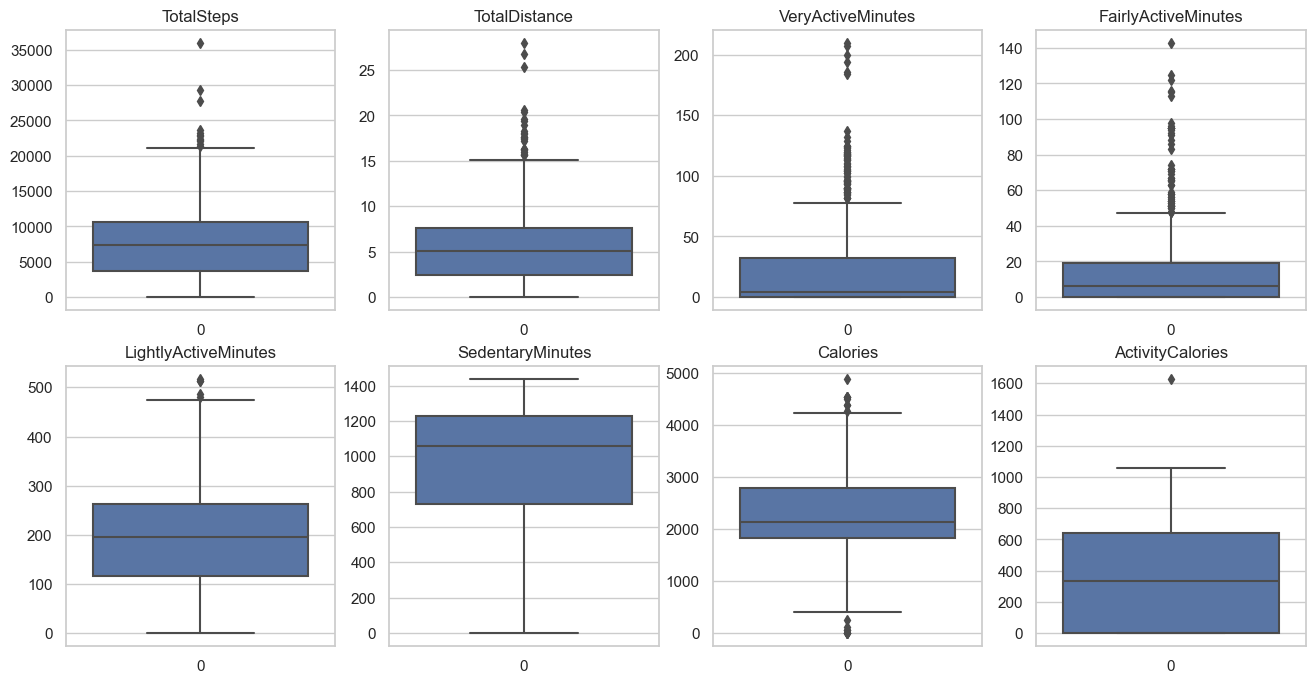

In [ ]:

#Looking for outliers with the use of Box plots 

#List columns I want to plot 
columns_to_plot = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
                   'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'ActivityCalories']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8)) 

# Flatten the axes so we can iterate through all the subplots using a single loop instead of two 
axes = axes.flatten()

# Plot each boxplot 
for i, column in enumerate(columns_to_plot): #use enumerate to get both index and value of each column name 
    sns.boxplot(data[column], ax=axes[i])
    axes[i].set_title(column)

# Show the plot
plt.show()


All of the variables appear to have some outliers besides sedentary minutes. 

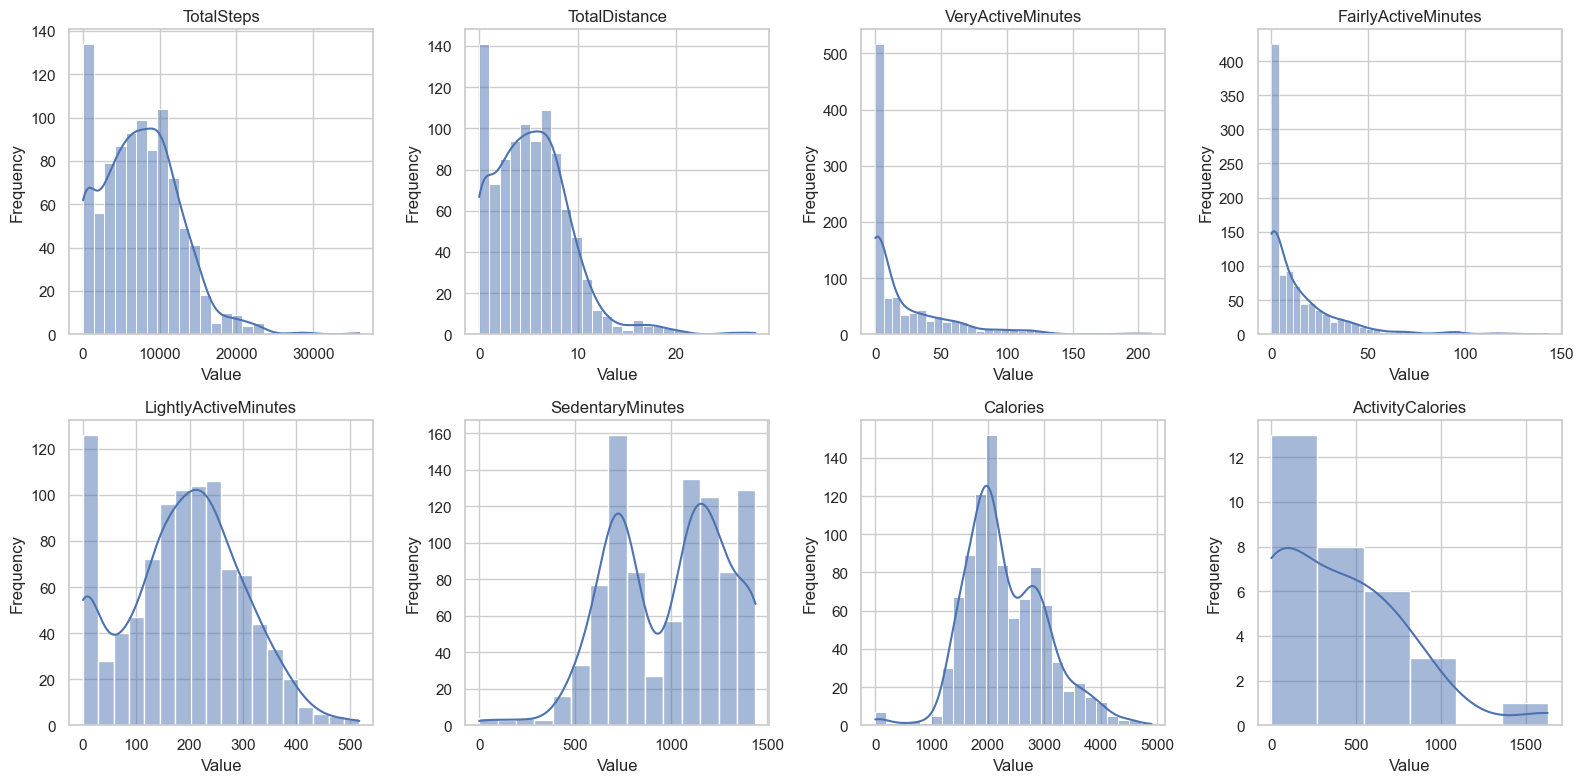

In [ ]:
#Looking at the distribution of each variable with histograms 

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))  

# Flatten the axes so we can iterate through all the subplots using a single loop instead of two 
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], ax=axes[i], kde=True)  #kde=True adds a smooth curve to the histograms 
    axes[i].set_title(column)
    axes[i].set_xlabel('Value') 
    axes[i].set_ylabel('Frequency') 


plt.tight_layout() #adjusts padding to prevent overlapping of graph axes 

# Show the plot
plt.show()


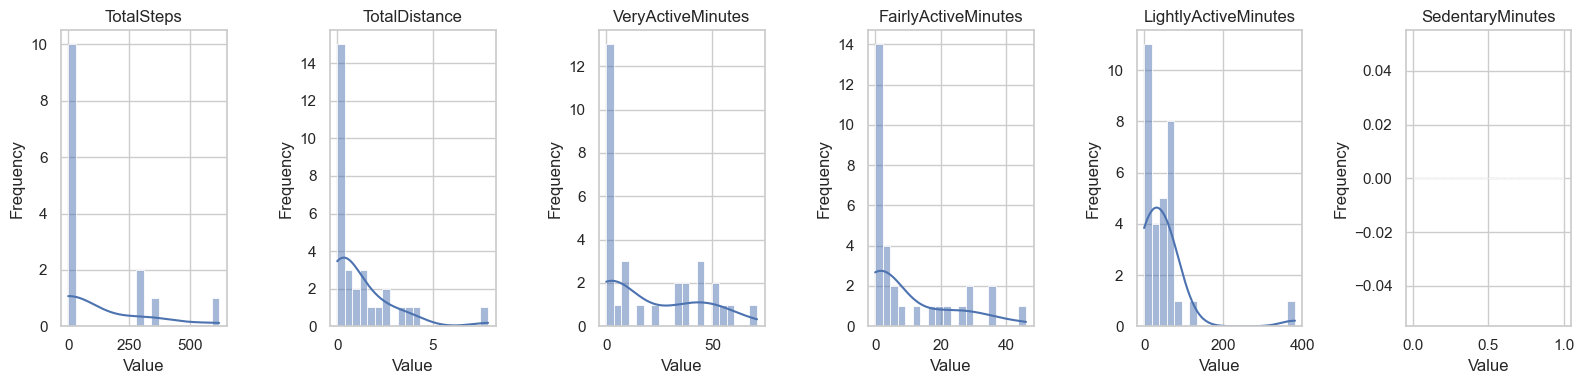

In [ ]:
#Histograms for just my data 

# Filter the data for "Id" equal to 1 (my ID)
data_id_1 = data[data['Id'] == 1]

#Columns I want to plot
columns_to_plot = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
                   'LightlyActiveMinutes', 'SedentaryMinutes']

fig, axes = plt.subplots(1, 6, figsize=(16, 4)) #1 row, 6 plots 

# Plot each histogram
for i, column in enumerate(columns_to_plot):
    sns.histplot(data_id_1[column], ax=axes[i], bins=20, kde=True) 
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout() #adjusts padding to prevent overlapping of graph axes

# Show the plots
plt.show()

In [277]:
data.dtypes

ActivityDate            datetime64[ns]
Calories                       float64
TotalSteps                       int64
TotalDistance                  float64
SedentaryMinutes                 int64
LightlyActiveMinutes             int64
FairlyActiveMinutes              int64
VeryActiveMinutes                int64
ActivityCalories               float64
Id                               int64
dtype: object

<large>**Data Dictionary:** </large> <br>
**Variable:**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Type:**   &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;   **Description:**    <br>
ActivityDate  &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;  datetime &nbsp;&nbsp;&nbsp;    The dates the users' Fitbit data was collected on <br>
TotalSteps &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      int   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;      The number of steps the user took throughout the logged day <br>
TotalDistance &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     float   &nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;    The total distance the user walked throughout the logged day (in  miles) <br>
VeryActiveMinutes &nbsp;&nbsp;  int   &nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;     The number of very active minutes the user had during the logged day  <br>
FairlyActiveMinutes &nbsp;&nbsp;int   &nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;    The number of fairly active minutes the user had during the logged day <br>
LightlyActiveMinutes int   &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;     The number of lightly active minutes the user had during the logged day <br>
SedentaryMinutes &nbsp;&nbsp;&nbsp; int   &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;The number of sedentary minutes the user had during the logged day <br>
Calories &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    float   &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;     The total number of calories the user burned throughout the logged day <br>
ActivityCalories &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  float   &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   The number of calories the user burned during exercise on the logged day     <br>
Id &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; int &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The ID number of the Fitbit User with ID=1 representing my personal data

Note** "Very Active", "Fairly Active", "Lightly Active", and "Sedentary" minutes are categorized by Fitbit metrics

**A list of potential UI components for my dashboard:** <br>
- radio buttons
- date slider
- dropdown 
- icons 
- white background to keep dashboard clean and make graphs stand out 
- use the rule of thirds for the graphs and text
- text with a consistent font 


**A list of potential data visualizations for my dashboard:**
- A histogram of the distribution of active minutes for the Fitbit users - with a dropdown to choose "Very", "Fairly", or "Lightly" active minutes <br>
- Animated Plotly bubble chart of total steps for each user (bubble size increases with calories) that has an interaction feature with a date slider <br>
- Line plot to show number of very active minutes over time  -  with radio button with options of Fitbit users data and my personal data <br>
- Pie chart of my personal data to display the distribution of my physical activity (%very active, %fairly active, %lightly active minutes) <br>
- Scatterplot of Calories burned (x) and number of very active minutes (y) for all Fitbit users 
